In [23]:
import struct
import numpy as np
from array import array
import matplotlib.pyplot as plt
import math
import numpy.linalg as LA

%matplotlib inline

def load_mnist(dataset="training", selecteddigits=range(10),  path=r'C:\Users\Greentea\Desktop\ucsc\ML\hw\03\train-images-idx3-ubyte_1'):
    # Check training/testing specification. Must be "training" (default) or "testing"
    if dataset == "training":
        fname_digits = path + '\\' + 'train-images.idx3-ubyte'
        fname_labels = path + '\\' + 'train-labels.idx1-ubyte'
    elif dataset == "testing":
        fname_digits = path + '\\' + 't10k-images.idx3-ubyte'
        fname_labels = path + '\\' + 't10k-labels.idx1-ubyte'
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Import digits data
    digitsfileobject = open(fname_digits, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", digitsfileobject.read(16))
    digitsdata = array("B", digitsfileobject.read())
    digitsfileobject.close()

    # Import label data
    labelsfileobject = open(fname_labels, 'rb')
    magic_nr, size = struct.unpack(">II", labelsfileobject.read(8))
    labelsdata = array("B", labelsfileobject.read())
    labelsfileobject.close()

    # Find indices of selected digits
    indices = [k for k in range(size) if labelsdata[k] in selecteddigits]
    N = len(indices)

    # Create empty arrays for X and T
    X = np.zeros((N, rows * cols), dtype=np.uint8)
    T = np.zeros((N, 1), dtype=np.uint8)

    for i in range(N):
        X[i] = digitsdata[indices[i] * rows * cols:(indices[i] + 1) * rows * cols]
        T[i] = labelsdata[indices[i]]
    return X, T


def vectortoimg(v, show=True):
    plt.imshow(v.reshape(28, 28), interpolation='None', cmap='gray')
    plt.axis('off')
    if show:
        plt.show()


Checking multiple training vectors by plotting images.
Be patient:


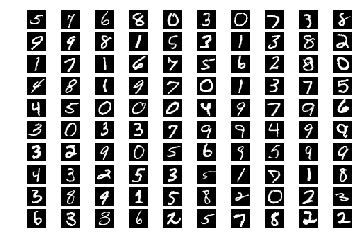

In [24]:
X, T = load_mnist(dataset="training", selecteddigits=range(0, 10))
print("Checking multiple training vectors by plotting images.\nBe patient:")
plt.close('all')
fig = plt.figure()
nrows = 10
ncols = 10
for row in range(nrows):
    for col in range(ncols):
        plt.subplot(nrows, ncols, row * ncols + col + 1)
        vectortoimg(X[np.random.randint(len(T))], show=False)
plt.show()

In [25]:
from sklearn.decomposition import PCA

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(X)

# Inspect the shape
print("Shape of reduced_data_pca:", reduced_data_pca.shape)
print("---")
print("PCA:")
print(reduced_data_pca)

Shape of reduced_data_pca: (60000, 2)
---
PCA:
[[ 123.93052301 -312.68417407]
 [1011.71804141 -294.85748804]
 [ -51.84982222  392.16841008]
 ...
 [-178.05381254  160.07612857]
 [ 130.60590573   -5.58668045]
 [-173.43525397  -24.71670811]]


In [26]:
T_name= np.unique(T)
TT = np.zeros(len(T))  # pseudo T for looping through XX[TT==1]
for i, b in enumerate(T):
    TT[i] = b


In [27]:
# plot reduced dimension dataset
def plot_scatter(XX, TT):
    colors = ['black', 'blue', 'purple', 'yellow', 'teal', 'red', 'lime', 'cyan', 'orange', 'gray']
    #from matplotlib import cm
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    ax.set_title(" Reduced data 784 -> 2", fontsize=14)
    ax.grid(True, linestyle='-', color='0.75')
    for i in range(len(colors)):
            ax.scatter(XX[TT == i][:, 0], XX[TT == i][:, 1], s=3, c=colors[i], marker='o');
        # ax.scatter(XX[:,0],XX[:,1],s=20,c=zz, marker = 'o', cmap = cm.jet );
    plt.legend(np.unique(TT), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()



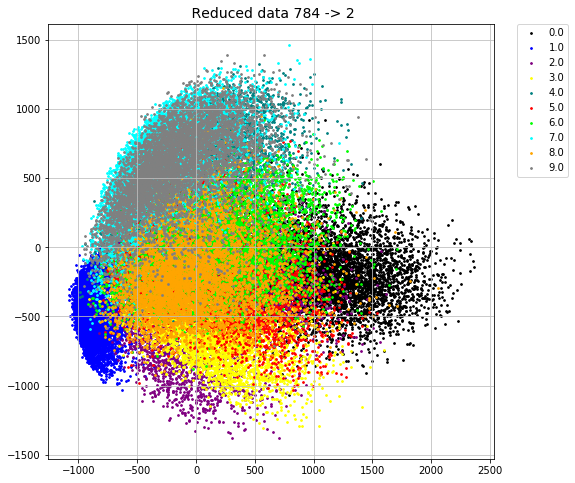

In [28]:
plot_scatter(reduced_data_pca,TT)

In [29]:
def plot_scatter_ii(XX, TT):
    colors = ['black', 'blue', 'purple', 'yellow', 'teal', 'red', 'lime', 'cyan', 'orange', 'gray']
    fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey = True,figsize=(80,80))
    #ax.set_title(" Reduced data 784 -> 2", fontsize=14)
    #ax.grid(True, linestyle='-', color='0.75')
    for i in range(len(colors)):
        for j in range(len(colors)):
            axes[i][j].scatter(XX[TT == i][:, 0], XX[TT == i][:, 1], c=colors[i], marker='o');
            axes[i][j].scatter(XX[TT == j][:, 0], XX[TT == j][:, 1], c=colors[j], marker='o');
        # ax.scatter(XX[:,0],XX[:,1],s=20,c=zz, marker = 'o', cmap = cm.jet );
            axes[i][j].set_title(str(i)+"vs"+str(j),fontsize=100)
    plt.show()

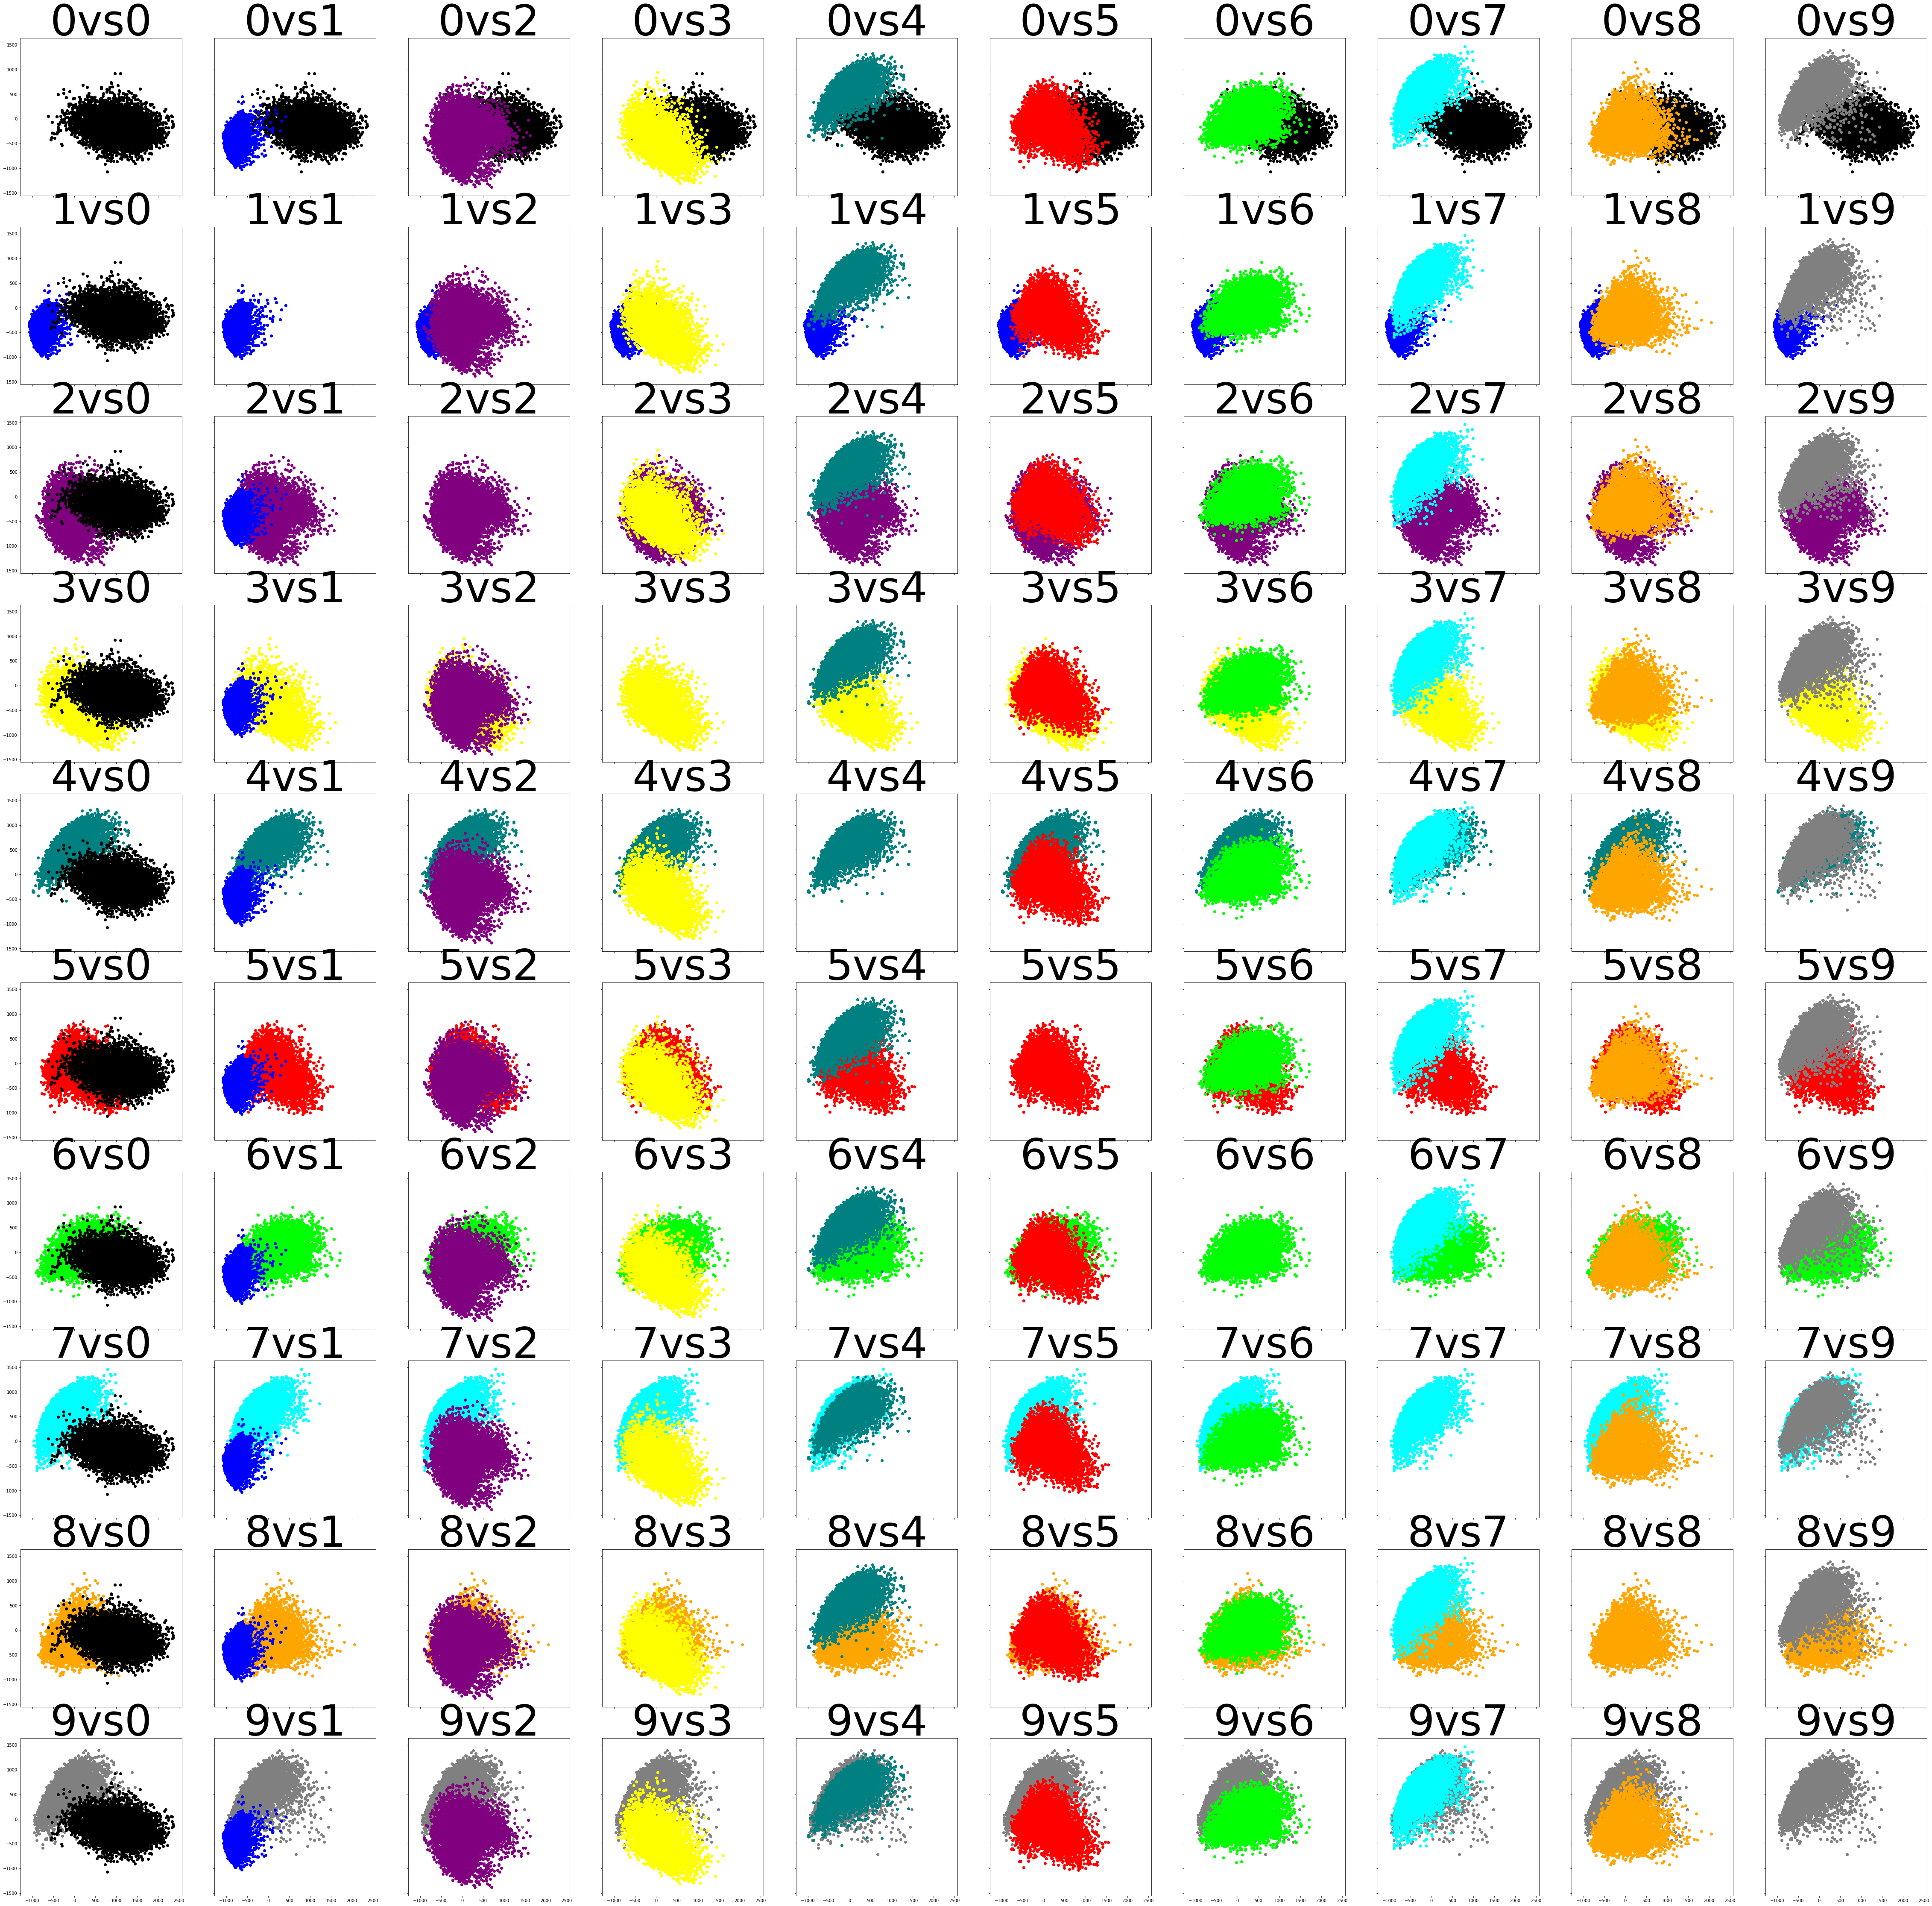

In [30]:
 plot_scatter_ii(reduced_data_pca,TT)

In [31]:
def T_mapping(T_pred,TT):
    ZZ=np.array(pd.crosstab(T_pred,TT,rownames=["Actual"], colnames=["Predict"]))
    dic={}
    for i in range(ZZ.shape[0]):
        ZZ1=sorted(ZZ[i])
        j=ZZ.shape[0]-1
        key = np.where(ZZ[i,:] ==ZZ1[j])[0][0]
        if key in dic.keys():
            gg = len(np.where(ZZ[i,:] ==ZZ1[j])[0])
            while key in dic.keys():
                if gg>0:
                    gg-=1
                    key = np.where(ZZ[i,:] ==ZZ1[j])[0][gg]
                else:
                    j-=1
                    key = np.where(ZZ[i,:] ==ZZ1[j])[0][gg]
                    gg = len(np.where(ZZ[i,:] ==ZZ1[j])[0])
            #print("optimized pridictiton is " + str(key)+"\t Actual is "+str(i))
            dic[key]=i
        else:
            dic[key]=i
            #print("pridictiton is " + str(key)+"\t value is "+str(i))
    dict_map={}
    for key in dic.keys():
        dict_map[dic[key]]=key
    
    #print(dict_map)
    return [dict_map[i] for i in T_pred]




Find the most common prediction for each Actual label,
EX:most 1 is predicted to 9, map prediction 9 to label 1.
if it (label 1) is uesd,find the second frequent used label ,and so on. 

In [32]:
def cal_prob(T_predict,TT):
    count1=0
    for i in range(TT.shape[0]):
            if TT[i] == T_predict[i]: 
                count1 += 1
#     print(count1/TT.shape[0])
    return (count1/TT.shape[0])

To count the correct rate 

In [33]:
#Accuracy of training set


from sklearn.mixture import GaussianMixture
import pandas as pd

reduced_data_pca_n=[]
gmm_n=[]
gmm_fit=[]
T_under_mapping=[]
T_prediction=[]
prob=[]
for i in range(0,9):
    reduced_data_pca_n.append(PCA(n_components=i+1,random_state=42).fit_transform(X))
    gmm_n.append(GaussianMixture(n_components =10,random_state=42))
    gmm_fit.append(gmm_n[i].fit(reduced_data_pca_n[i]))
    T_under_mapping.append(gmm_fit[i].predict(reduced_data_pca_n[i]))
    T_prediction.append(T_mapping(T_under_mapping[i],TT))
    prob.append(cal_prob(T_prediction[i],TT))
    print("PCA "+ str(i+1)+" dim")
    print("Correct rate :" + str(prob[i]))

PCA 1 dim
Correct rate :0.22981666666666667
PCA 2 dim
Correct rate :0.38003333333333333
PCA 3 dim
Correct rate :0.35335
PCA 4 dim
Correct rate :0.44915
PCA 5 dim
Correct rate :0.3759
PCA 6 dim
Correct rate :0.5091666666666667
PCA 7 dim
Correct rate :0.5572
PCA 8 dim
Correct rate :0.5486666666666666
PCA 9 dim
Correct rate :0.5541333333333334


Find the trend between PCA dim  and correct rate,store all of the process in list

Text(0,0.5,'Correct rate')

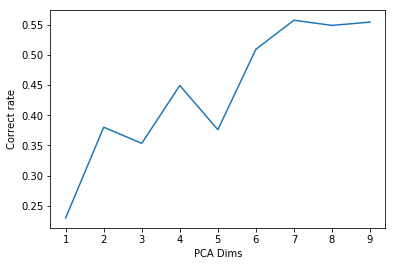

In [34]:
dim = range(1,10,1)
plt.plot(dim,prob)
plt.xlabel("PCA Dims")
plt.ylabel("Correct rate")

In [35]:
confusion_matrix_n=[]
report_n=[]
from sklearn import metrics
for i in range(0,9):
    confusion_matrix_n.append(confusion_matrix(TT,T_prediction[i]))
    report_n.append(metrics.classification_report(TT,T_prediction[i]))
    print("\nPCA to "+str(i+1) + " Dim\n")
    print("confusion_matrix\n")
    print(confusion_matrix_n[i])
    print("\nreport\n")
    print(report_n[i])
    
    

NameError: name 'confusion_matrix' is not defined

In [ ]:
# #SVM
# from sklearn import svm
# classifier = svm.LinearSVC(random_state=42)
# classifier.fit(X, TT)
# T_svm = classifier.predict(X)
# cal_prob(T_svm,TT)

In [36]:
#Accuracy of test set

Xtest, TTest = load_mnist(dataset="testing", selecteddigits=range(0, 10))
TT = np.zeros(len(TTest))  # pseudo T for looping through XX[TT==1]
for i, b in enumerate(TTest):
    TT[i] = b

In [37]:
from sklearn.mixture import GaussianMixture
import pandas as pd
print("Testing set prediction result")
reduced_data_pca_n=[]
gmm_n=[]
gmm_fit=[]
T_under_mapping=[]
T_prediction=[]
prob2=[]
for i in range(0,9):
    reduced_data_pca_n.append(PCA(n_components=i+1,random_state=42).fit_transform(Xtest))
    gmm_n.append(GaussianMixture(n_components =10,random_state=42))
    gmm_fit.append(gmm_n[i].fit(reduced_data_pca_n[i]))
    T_under_mapping.append(gmm_fit[i].predict(reduced_data_pca_n[i]))
    T_prediction.append(T_mapping(T_under_mapping[i],TT))
    prob2.append(cal_prob(T_prediction[i],TT))
    print("PCA "+ str(i+1)+" dim")
    print("Correct rate :" + str(prob2[i]))

Testing set prediction result
PCA 1 dim
Correct rate :0.2594
PCA 2 dim
Correct rate :0.3537
PCA 3 dim
Correct rate :0.422
PCA 4 dim
Correct rate :0.4171
PCA 5 dim
Correct rate :0.3994
PCA 6 dim
Correct rate :0.5549
PCA 7 dim
Correct rate :0.5259
PCA 8 dim
Correct rate :0.4737
PCA 9 dim
Correct rate :0.5474


Text(0,0.5,'Correct rate')

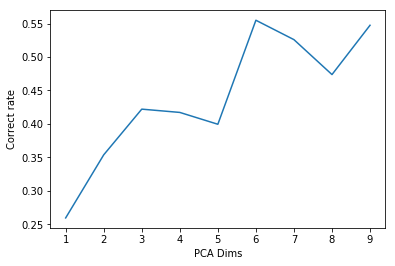

In [38]:
dim = range(1,10,1)
plt.plot(dim,prob2)
plt.xlabel("PCA Dims")
plt.ylabel("Correct rate")

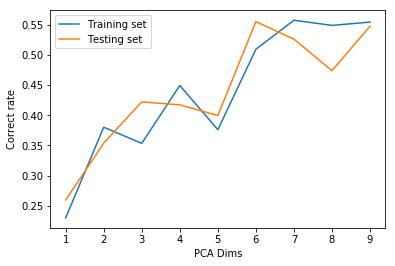

In [41]:
dim = range(1,10,1)
label = ["Training set","Testing set"]
plt.plot(dim,prob,label = label[0])
plt.plot(dim,prob2,label = label[1])
plt.xlabel("PCA Dims")
plt.ylabel("Correct rate")
plt.legend(loc="best")
